In [1]:
import sys
sys.path.append('../')
import helper

import numpy as np

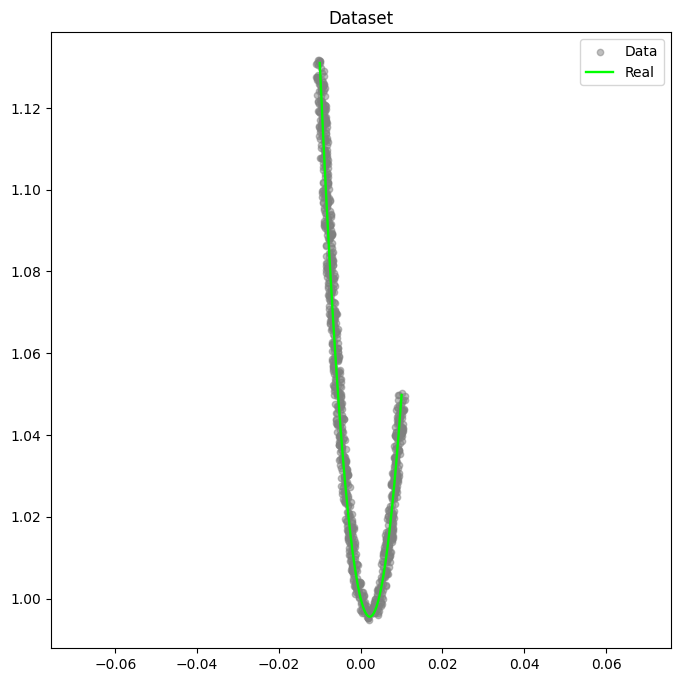

In [2]:
import torch

dataset_name = '1'
dataset_params = helper.get_params_dataset(dataset_name)
dataset_filename = helper.get_filenames_datasets()[dataset_name]
f = helper.get_func_research(dataset_params['f_label'])

X, Y, datasets = helper.load_datasets(dataset_filename)

helper.print_generated(X, Y, datasets[0], title="Dataset")

real_w = np.array([dataset_params["w0"], dataset_params["w1"]], dtype=float)

x_train, y_train = torch.from_numpy(datasets[0][:, :-1]), torch.from_numpy(datasets[0][:, -1:])
x_train_numpy, y_train_numpy = datasets[0][:, :-1], datasets[0][:, -1:]

eps_minimum = helper.mse_loss_torch(x_train, y_train, torch.from_numpy(real_w), f)
eps_minimum = eps_minimum*1.1

initial_w = np.array([-1.0, 0.1])

Real w: [2. 3.]
Обученные значения w: [1.80948705 2.98686657] steps: 510


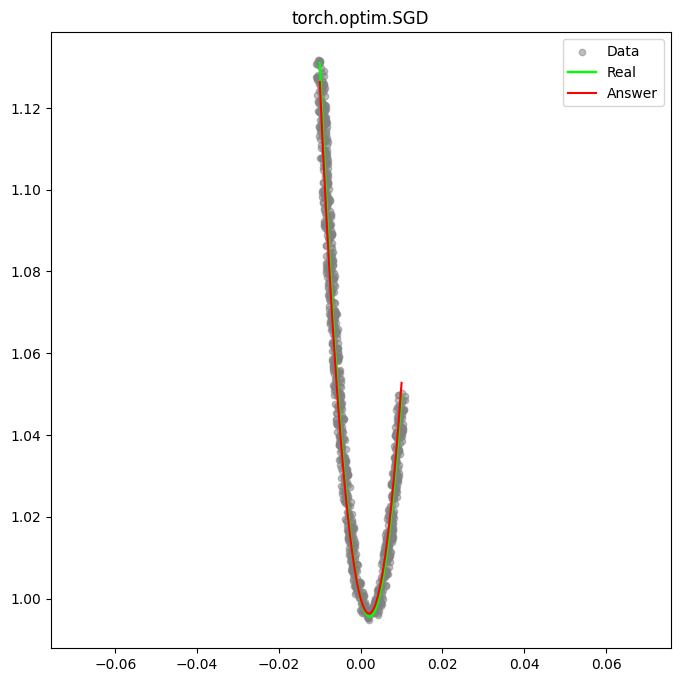

In [3]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.SGD, lr=10)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.SGD")

Real w: [2. 3.]
Обученные значения w: [2.15417791 2.89203692] steps: 92


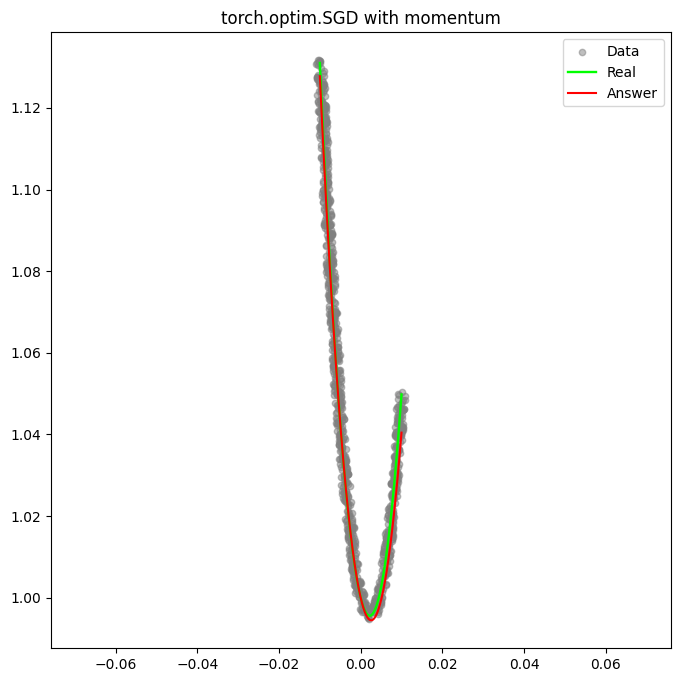

In [4]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.SGD, lr=10, momentum=0.9)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.SGD with momentum")

Real w: [2. 3.]
Обученные значения w: [2.15938144 2.89388305] steps: 87


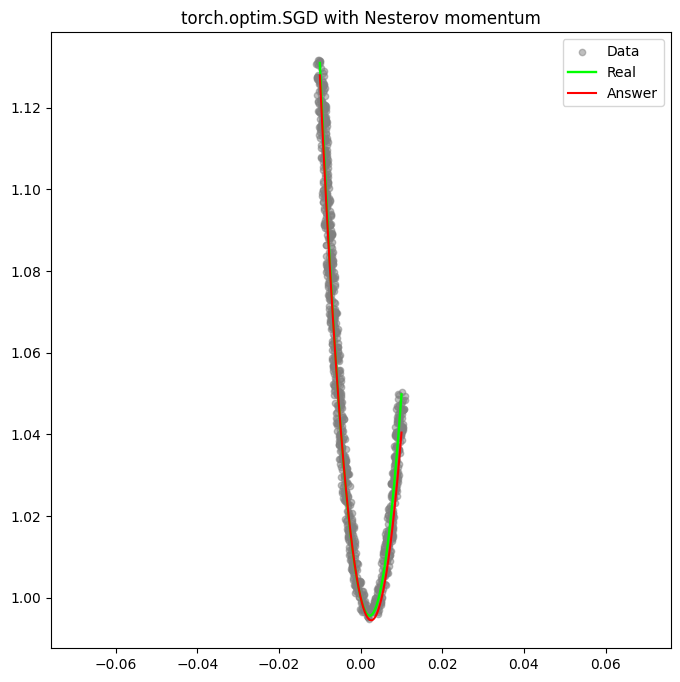

In [5]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.SGD, lr=10, momentum=0.9, nesterov=True)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.SGD with Nesterov momentum")

Real w: [2. 3.]
Обученные значения w: [2.0828036  2.89153145] steps: 61


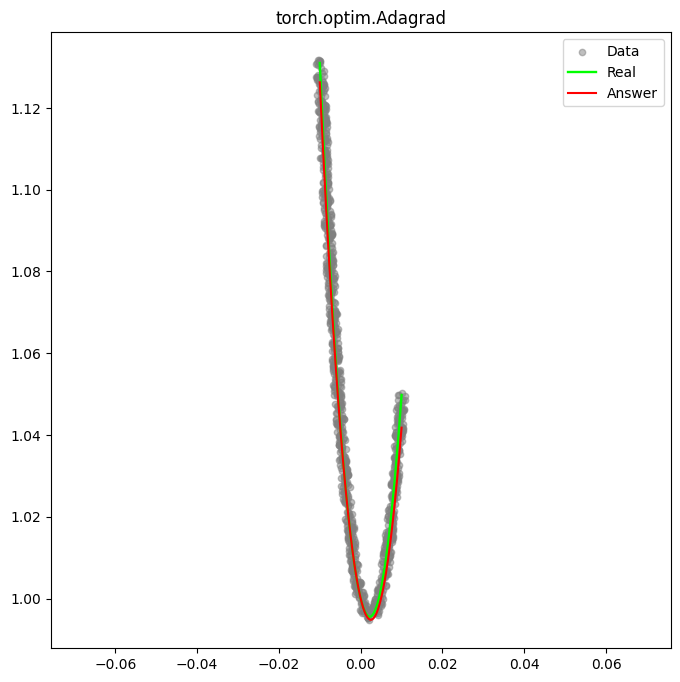

In [6]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.Adagrad, lr=10)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.Adagrad")

Real w: [2. 3.]
Обученные значения w: [2.05955456 2.93364623] steps: 47


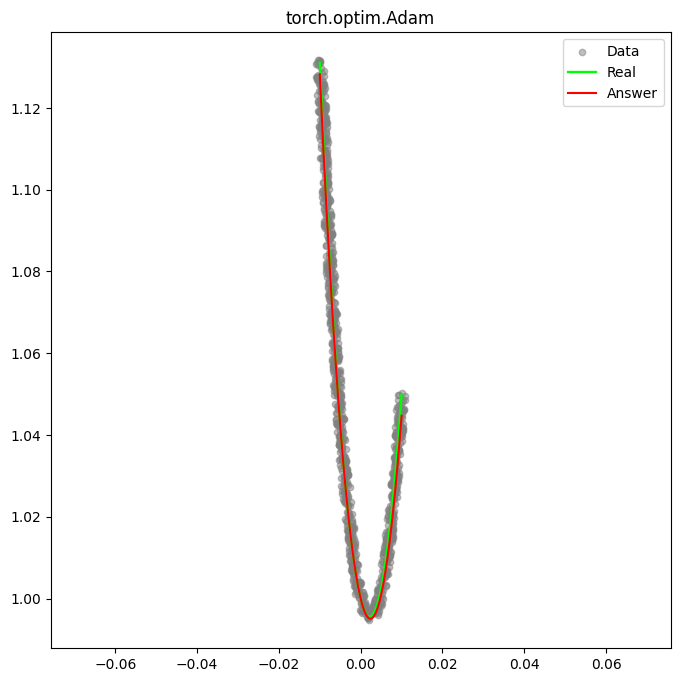

In [7]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.Adam, lr=5)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.Adam")

Real w: [2. 3.]
Обученные значения w: [2.08603404 2.88757034] steps: 54


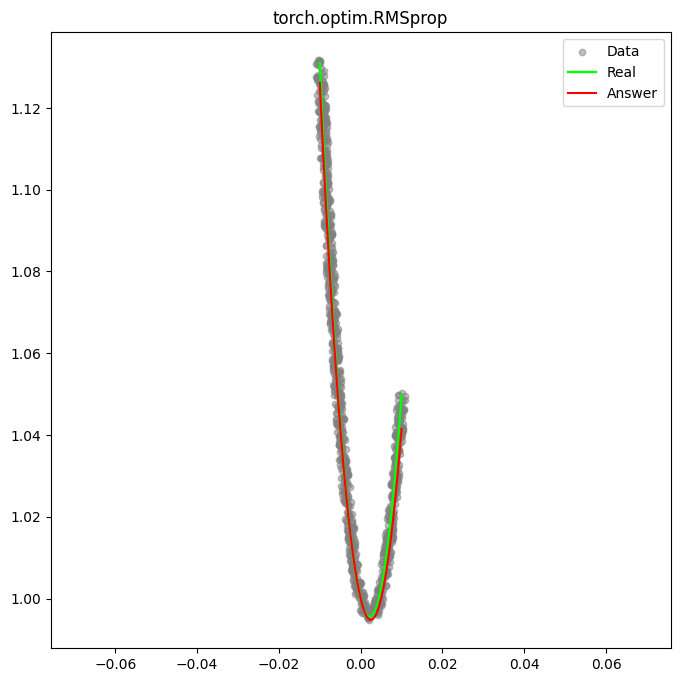

In [8]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, torch.optim.RMSprop, lr=1)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="torch.optim.RMSprop")

Real w: [2. 3.]
Обученные значения w: [1.80948705 2.98686657] steps: 510


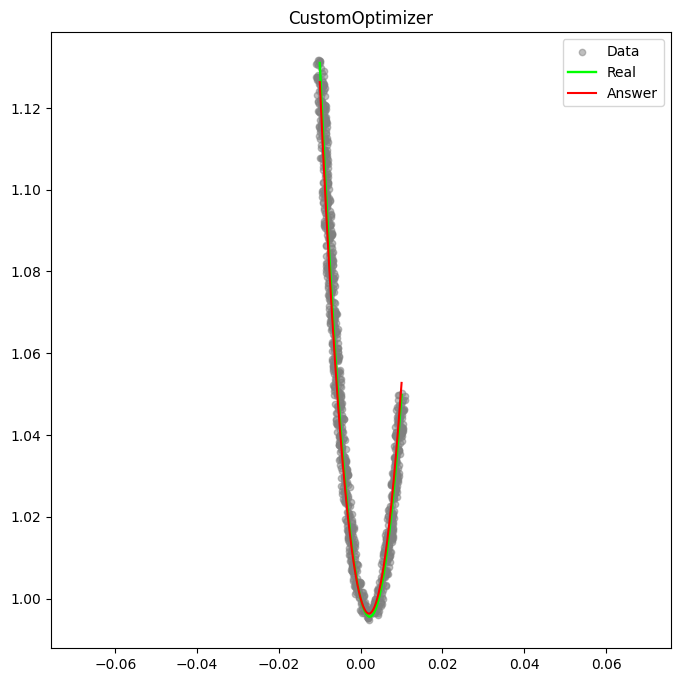

In [9]:
points = helper.train_torch_optim(f, x_train, y_train, eps_minimum, initial_w, helper.mse_loss_torch, helper.CustomOptimizer, lr=10)
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title="CustomOptimizer")

======================= SGD =======================
Real w: [2. 3.]
Обученные значения w: [1.80989125 2.98577245] steps: 509


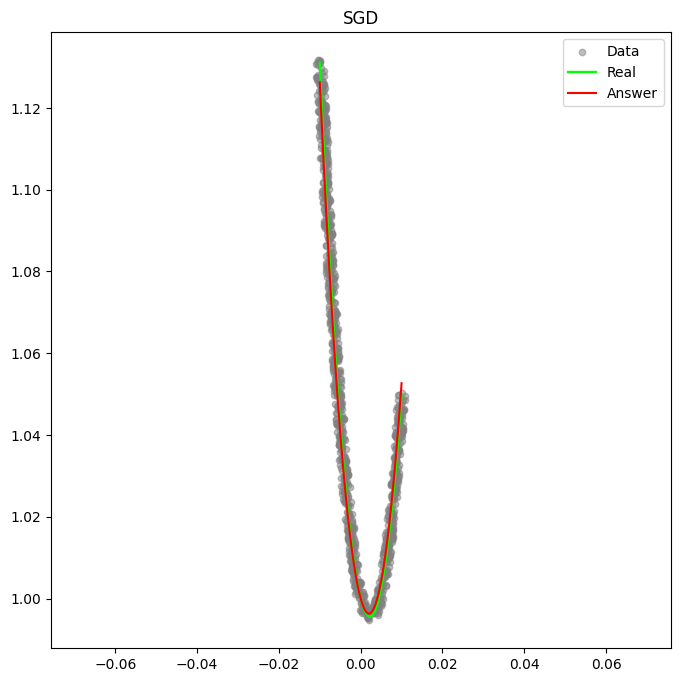

In [19]:
# ==================================================<< SGD >>===================================================== #

METHOD_NAME = 'SGD'
points = helper.train_our_sgd(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=10)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< SGD >>===================================================== #

======================= Momentum =======================
Real w: [2. 3.]
Обученные значения w: [2.21247291 2.91667544] steps: 90


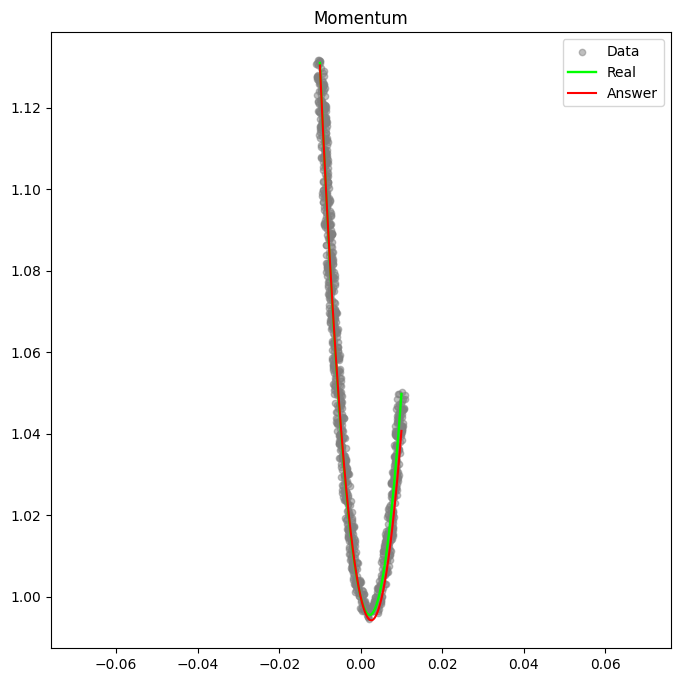

In [20]:
# ==================================================<< Momentum >>===================================================== #

METHOD_NAME = 'Momentum'
points = helper.train_our_momentum(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=10)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< Momentum >>===================================================== #

======================= Nesterov =======================
Real w: [2. 3.]
Обученные значения w: [2.22387241 2.94728695] steps: 84


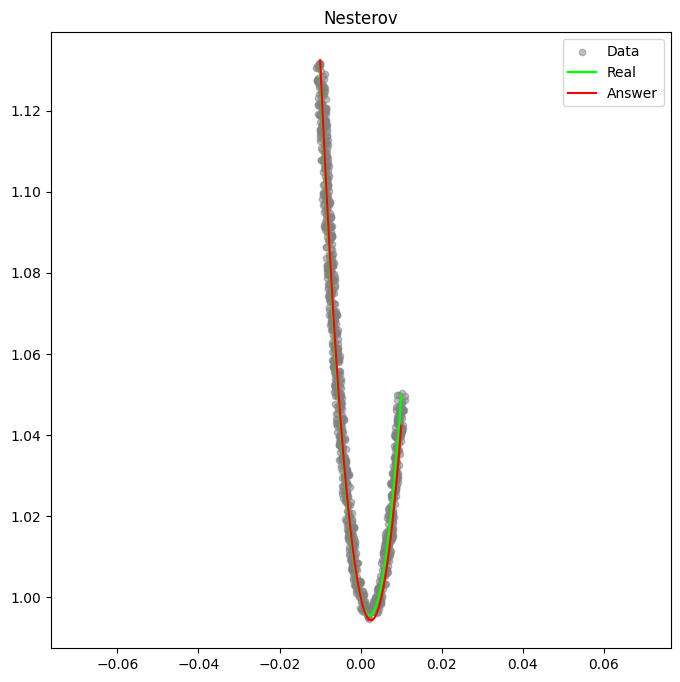

In [21]:
# ==================================================<< Nesterov >>===================================================== #

METHOD_NAME = 'Nesterov'
points = helper.train_our_nesterov(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=10)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< Nesterov >>===================================================== #

======================= AdaGrad =======================
Real w: [2. 3.]
Обученные значения w: [1.96800812 3.04239112] steps: 138


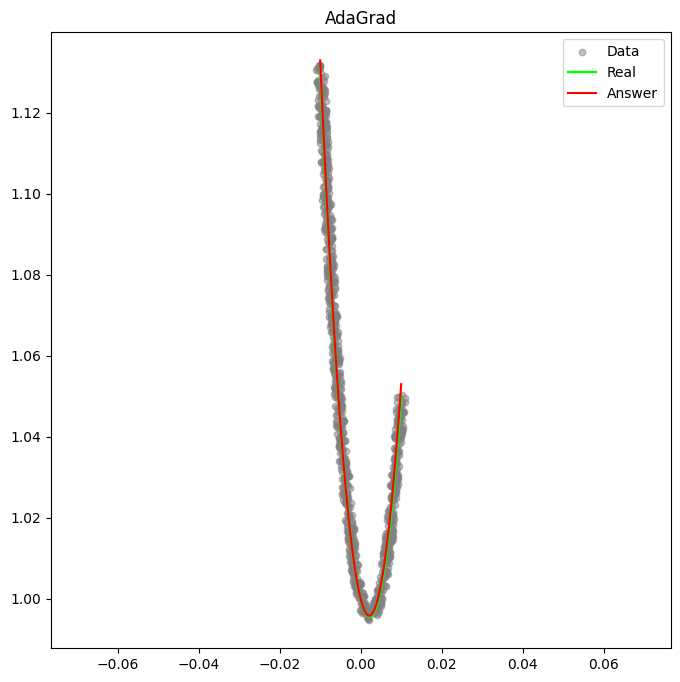

In [26]:
# ==================================================<< AdaGrad >>===================================================== #

METHOD_NAME = 'AdaGrad'
points = helper.train_our_ada_grad(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=10)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< AdaGrad >>===================================================== #

======================= RMSProp =======================
Real w: [2. 3.]
Обученные значения w: [1.81551386 2.97665747] steps: 46


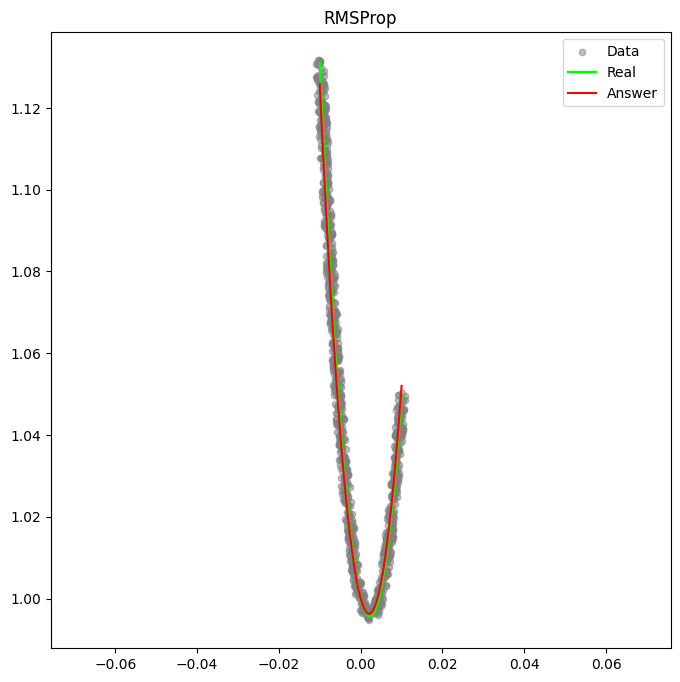

In [40]:
# ==================================================<< RMSProp >>===================================================== #

METHOD_NAME = 'RMSProp'
points = helper.train_our_rms_prop(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=0.1)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< RMSProp >>===================================================== #

======================= Adam =======================
Real w: [2. 3.]
Обученные значения w: [2.21743579 2.93933931] steps: 35


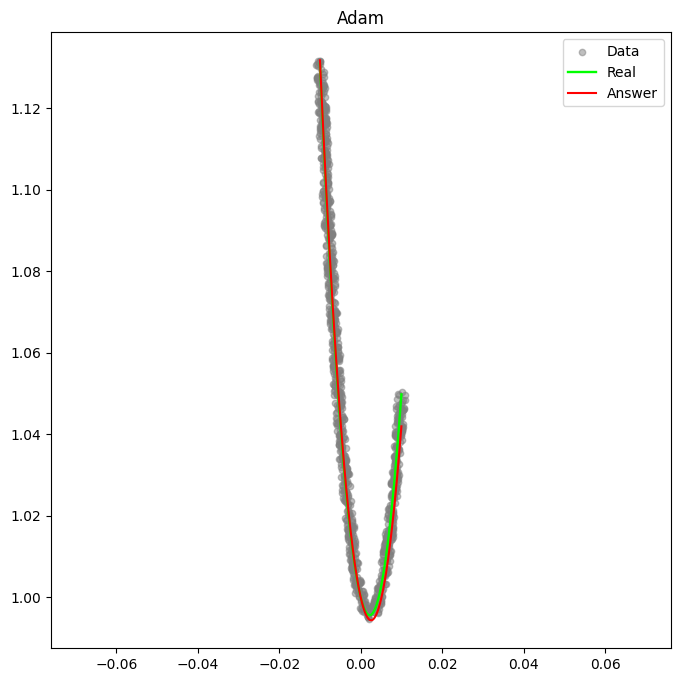

In [56]:
# ==================================================<< Adam >>===================================================== #

METHOD_NAME = 'Adam'
points = helper.train_our_adam(f, x_train_numpy, y_train_numpy, eps_minimum, initial_w, initial_lr=3)
print(f'{"=" * 23} {METHOD_NAME} {"=" * 23}')
print(f'Real w: {real_w}')
print("Обученные значения w:", points[-1], "steps:", len(points))
helper.print_generated(X, Y, datasets[0], f(X, points[-1]), title=METHOD_NAME)

# ==================================================<< Adam >>===================================================== #